## Supervised linear regression

Voor het product: 45 over het komende jaar

In [13]:
import pandas as pd
import pyodbc
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
database = {'servername': 'localhost\SQLEXPRESS',
            'database': 'DATAWAREHOUSE'}
format = '%d-%m-%Y'

conn_str = ('DRIVER={SQL Server};'
            f'SERVER={database["servername"]};'
            f'DATABASE={database["database"]};'
            'Trusted_Connection=yes')

query = "SELECT * FROM dbo.sales_order"

#inladen naar df
try:
    with pyodbc.connect(conn_str) as conn:
        product_df = pd.read_sql_query(query, conn)
except Exception as e:
    print(f"An error occurred: {e}")


<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
C:\Users\bartv\AppData\Local\Temp\ipykernel_9756\459806266.py:8: SyntaxWarning: invalid escape sequence '\S'
  database = {'servername': 'localhost\SQLEXPRESS',
C:\Users\bartv\AppData\Local\Temp\ipykernel_9756\459806266.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  product_df = pd.read_sql_query(query, conn)


In [57]:
# opsplitsen naar verschillende df's

orders_from_nw = product_df[product_df['product_id'].str.contains('NW')]
orders_from_aenc = product_df[product_df['product_id'].str.contains('AC')]
orders_from_aw = product_df[product_df['product_id'].str.contains('AW')]

orders_from_aenc


,S_KEY,id,line_id,unit_price,quantity,freight,sub_total,tax_amt,total_due,revenue,...,product_size_unit_measure_code,product_weight_unit_measure_code,product_vendor_country,product_vendor_city,product_vendor_postal_code,product_vendor_address,product_vendor_name,product_color,product_quantity,change_date
0,5197,2001,1,9.0,12,NaN,108.0,NaN,108.0,108.0,...,None,None,None,None,None,None,None,White,18,b'\x00\x00\x00\x00\x00\x00\x1c7'
1,5198,2001,2,14.0,12,NaN,168.0,NaN,168.0,168.0,...,None,None,None,None,None,None,None,Orange,39,b'\x00\x00\x00\x00\x00\x00\x1c8'
2,5199,2001,3,14.0,12,NaN,168.0,NaN,168.0,168.0,...,None,None,None,None,None,None,None,Black,72,b'\x00\x00\x00\x00\x00\x00\x1c9'
3,5200,2002,1,9.0,24,NaN,216.0,NaN,216.0,216.0,...,None,None,None,None,None,None,None,Black,92,b'\x00\x00\x00\x00\x00\x00\x1c:'
4,5201,2002,2,10.0,24,NaN,240.0,NaN,240.0,240.0,...,None,None,None,None,None,None,None,White,12,b'\x00\x00\x00\x00\x00\x00\x1c;'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,6295,2652,2,9.0,10,NaN,90.0,NaN,90.0,90.0,...,None,None,None,None,None,None,None,White,18,b'\x00\x00\x00\x00\x00\x00 \x86'
1099,6296,2653,1,14.0,0,NaN,0.0,NaN,0.0,0.0,...,None,None,None,None,None,None,None,Orange,39,b'\x00\x00\x00\x00\x00\x00 \x87'
1100,6297,2654,1,14.0,15,NaN,210.0,NaN,210.0,210.0,...,None,None,None,None,None,None,None,Orange,39,b'\x00\x00\x00\x00\x00\x00 \x88'
1101,6298,2654,2,14.0,3,NaN,42.0,NaN,42.0,42.0,...,None,None,None,None,None,None,None,Black,72,b'\x00\x00\x00\x00\x00\x00 \x89'


In [58]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

product_df

,S_KEY,id,line_id,unit_price,quantity,freight,sub_total,tax_amt,total_due,revenue,...,product_size_unit_measure_code,product_weight_unit_measure_code,product_vendor_country,product_vendor_city,product_vendor_postal_code,product_vendor_address,product_vendor_name,product_color,product_quantity,change_date
0,5197,2001,1,9.00,12,NaN,108.00,NaN,108.0000,108.0000,...,None,None,None,None,None,None,None,White,18,b'\x00\x00\x00\x00\x00\x00\x1c7'
1,5198,2001,2,14.00,12,NaN,168.00,NaN,168.0000,168.0000,...,None,None,None,None,None,None,None,Orange,39,b'\x00\x00\x00\x00\x00\x00\x1c8'
2,5199,2001,3,14.00,12,NaN,168.00,NaN,168.0000,168.0000,...,None,None,None,None,None,None,None,Black,72,b'\x00\x00\x00\x00\x00\x00\x1c9'
3,5200,2002,1,9.00,24,NaN,216.00,NaN,216.0000,216.0000,...,None,None,None,None,None,None,None,Black,92,b'\x00\x00\x00\x00\x00\x00\x1c:'
4,5201,2002,2,10.00,24,NaN,240.00,NaN,240.0000,240.0000,...,None,None,None,None,None,None,None,White,12,b'\x00\x00\x00\x00\x00\x00\x1c;'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124570,129767,75122,121313,21.98,1,0.7743,30.97,2.4776,34.2219,34.2219,...,None,None,United States,Denver,80203,2342 Peachwillow,Green Lake Bike Company,None,108,b'\x00\x00\x00\x00\x00\x02\x04\xc1'
124571,129768,75122,121314,8.99,1,0.7743,30.97,2.4776,34.2219,34.2219,...,None,None,United States,Chula Vista,91910,75 Q St.,Integrated Sport Products,Multi,288,b'\x00\x00\x00\x00\x00\x02\x04\xc2'
124572,129769,75123,121315,21.98,1,4.7493,189.97,15.1976,209.9169,209.9169,...,None,None,United States,Denver,80203,2342 Peachwillow,Green Lake Bike Company,None,108,b'\x00\x00\x00\x00\x00\x02\x04\xc3'
124573,129770,75123,121316,159.00,1,4.7493,189.97,15.1976,209.9169,209.9169,...,None,None,United States,Denver,80203,2342 Peachwillow,Green Lake Bike Company,None,144,b'\x00\x00\x00\x00\x00\x02\x04\xc4'


# NW

In [59]:
import pandas as pd

def extract_year_month(df, date_column):
    df['year_month'] = df[date_column].dt.strftime('%Y-%m')
    return df


grouped_orders = orders_from_nw.groupby(['order_date']).agg({'id': 'count'})
sorted_orders = grouped_orders.reset_index().rename(columns={'id': 'order_count'})
sorted_orders = extract_year_month(sorted_orders, 'order_date')

sorted_orders.drop(['order_date'], axis=1, inplace=True)
sorted_orders = sorted_orders.groupby(['year_month']).agg({'order_count': 'sum'})
sorted_orders =  sorted_orders.reset_index()

orders = sorted_orders['order_count']
dates = sorted_orders['year_month']

values_dict = {dates[x]: orders[x] for x in range(len(orders) - 1)}
dates_2 = []
orders_2 = []
for k, v in values_dict.items():
    dates_2.append(k)
    orders_2.append(v)

values_dict = pd.DataFrame(values_dict, index=[0])

fin = {'year_month': dates_2, 'order_count': orders_2}
finished_df = pd.DataFrame(fin)
finished_df


,year_month,order_count
0,1996-07,59
1,1996-08,69
2,1996-09,57
3,1996-10,73
4,1996-11,66
5,1996-12,81
6,1997-01,85
7,1997-02,79
8,1997-03,77
9,1997-04,81


In [60]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

p, d, q = 1, 1, 1  
model = ARIMA(finished_df['order_count'], order=(p, d, q))
model_fit = model.fit()

forecast_steps = 1
future_dates = pd.date_range(start=pd.to_datetime('1998-05'), periods=forecast_steps, freq='M')
future_forecast = model_fit.forecast(steps=forecast_steps)

future_forecast_df = pd.DataFrame({'year_month': future_dates.strftime('%Y-%m'), 'order_count': int(future_forecast)})
finished_df = pd.concat([finished_df, future_forecast_df])

values_dict = {**values_dict, **{future_forecast_df.iloc[i]['year_month']: future_forecast_df.iloc[i]['order_count'] for i in range(len(future_forecast_df))}}
values_dict = pd.DataFrame(values_dict, index=[0])
values_dict


C:\Users\bartv\AppData\Local\Temp\ipykernel_9756\3687534062.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=pd.to_datetime('1998-05'), periods=forecast_steps, freq='M')
C:\Users\bartv\AppData\Local\Temp\ipykernel_9756\3687534062.py:15: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  future_forecast_df = pd.DataFrame({'year_month': future_dates.strftime('%Y-%m'), 'order_count': int(future_forecast)})


,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,...,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05
0,59,69,57,73,66,81,85,79,77,81,...,84,95,106,89,114,152,122,178,180,179


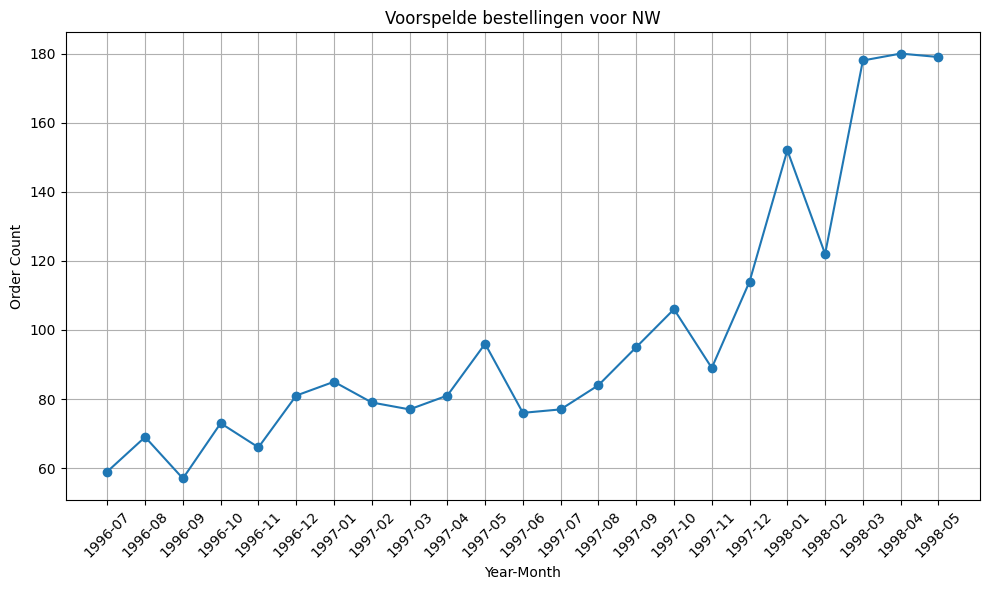

In [61]:
import matplotlib.pyplot as plt

# Gegevens
dates = values_dict.columns
order_counts = values_dict.values[0]

# Maak de plot
plt.figure(figsize=(10, 6))
plt.plot(dates, order_counts, marker='o', linestyle='-')
plt.title('Voorspelde bestellingen voor NW')
plt.xlabel('Year-Month')
plt.ylabel('Order Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2

#aenc

In [62]:
import pandas as pd

def extract_year_month(df, date_column):
    df['year_month'] = df[date_column].dt.strftime('%Y-%m')
    return df

grouped_orders = orders_from_aenc.groupby(['order_date']).agg({'id': 'count'})
sorted_orders = grouped_orders.reset_index().rename(columns={'id': 'order_count'})
sorted_orders = extract_year_month(sorted_orders, 'order_date')

sorted_orders.drop(['order_date'], axis=1, inplace=True)
sorted_orders = sorted_orders.groupby(['year_month']).agg({'order_count': 'sum'})
sorted_orders =  sorted_orders.reset_index()

orders = sorted_orders['order_count']
dates = sorted_orders['year_month']

values_dict = {dates[x]: orders[x] for x in range(len(orders)-2)}
dates_2 = []
orders_2 = []
for k, v in values_dict.items():
    dates_2.append(k)
    orders_2.append(v)

values_dict = pd.DataFrame(values_dict, index=[0])
fin = {'year_month': dates_2, 'order_count': orders_2}
finished_df = pd.DataFrame(fin)
finished_df



,year_month,order_count
0,1996-03,14
1,1996-04,23
2,1996-05,17
3,1996-06,10
4,1996-07,10
5,1996-08,9
6,1996-09,6
7,1996-10,8
8,1996-11,3
9,1996-12,5


In [63]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

p, d, q = 1, 1, 1 
model = ARIMA(finished_df['order_count'], order=(p, d, q))
model_fit = model.fit()

forecast_steps = 1
future_dates = pd.date_range(start=pd.to_datetime('1998-12'), periods=forecast_steps, freq='M')
future_forecast = model_fit.forecast(steps=forecast_steps)

future_forecast_df = pd.DataFrame({'year_month': future_dates.strftime('%Y-%m'), 'order_count': int(future_forecast)})
finished_df = pd.concat([finished_df, future_forecast_df])

values_dict = {**values_dict, **{future_forecast_df.iloc[i]['year_month']: future_forecast_df.iloc[i]['order_count'] for i in range(len(future_forecast_df))}}
values_dict = pd.DataFrame(values_dict, index=[0])
values_dict



C:\Users\bartv\AppData\Local\Temp\ipykernel_9756\3608899763.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=pd.to_datetime('1998-12'), periods=forecast_steps, freq='M')
C:\Users\bartv\AppData\Local\Temp\ipykernel_9756\3608899763.py:16: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  future_forecast_df = pd.DataFrame({'year_month': future_dates.strftime('%Y-%m'), 'order_count': int(future_forecast)})


,1996-03,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12
0,14,23,17,10,10,9,6,8,3,5,...,48,51,66,69,65,59,65,57,55,54


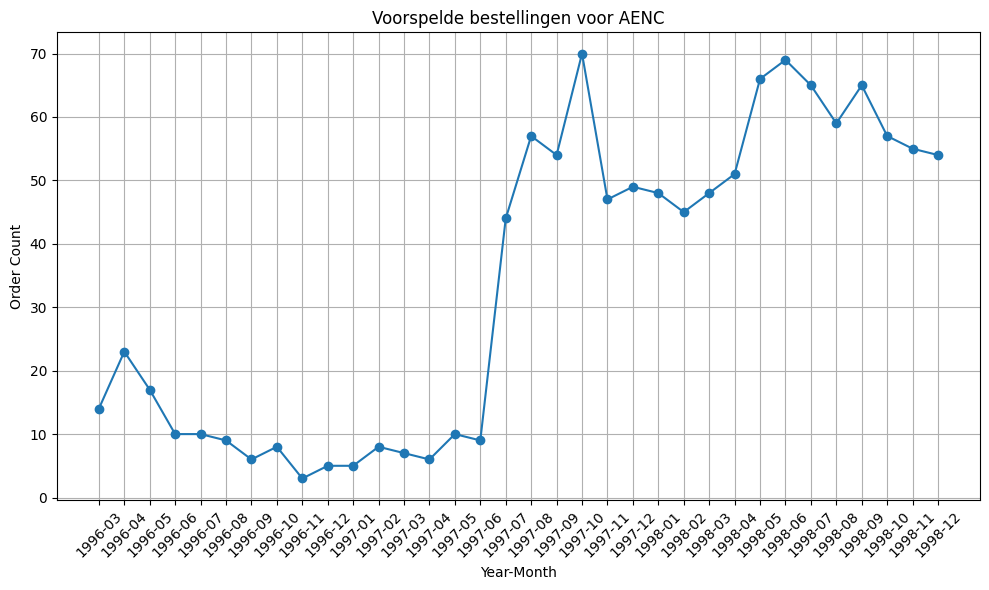

In [64]:
import matplotlib.pyplot as plt

# Gegevens
dates = values_dict.columns
order_counts = values_dict.values[0]

# Maak de plot
plt.figure(figsize=(10, 6))
plt.plot(dates, order_counts, marker='o', linestyle='-')
plt.title('Voorspelde bestellingen voor AENC')
plt.xlabel('Year-Month')
plt.ylabel('Order Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#aw

In [65]:
import pandas as pd

def extract_year_month(df, date_column):
    df['year_month'] = df[date_column].dt.strftime('%Y-%m')
    return df

grouped_orders = orders_from_aw.groupby(['order_date']).agg({'id': 'count'})
sorted_orders = grouped_orders.reset_index().rename(columns={'id': 'order_count'})

sorted_orders = extract_year_month(sorted_orders, 'order_date')

sorted_orders.drop(['order_date'], axis=1, inplace=True)
sorted_orders = sorted_orders.groupby(['year_month']).agg({'order_count': 'sum'})
sorted_orders =  sorted_orders.reset_index()
sorted_orders

orders = sorted_orders['order_count']
dates = sorted_orders['year_month']

values_dict = {dates[x]: orders[x] for x in range(len(orders))}
dates_2 = []
orders_2 = []
for k, v in values_dict.items():
    dates_2.append(k)
    orders_2.append(v)

values_dict = pd.DataFrame(values_dict, index=[0])

fin = {'year_month': dates_2, 'order_count': orders_2}
finished_df = pd.DataFrame(fin)
finished_df



,year_month,order_count
0,2011-05,357
1,2011-06,141
2,2011-07,941
3,2011-08,1242
4,2011-09,157
5,2011-10,2083
6,2011-11,230
7,2011-12,565
8,2012-01,1712
9,2012-02,676


In [66]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

p, d, q = 1, 1, 1 
model = ARIMA(finished_df['order_count'], order=(p, d, q))
model_fit = model.fit()

forecast_steps = 1
future_dates = pd.date_range(start=pd.to_datetime('2014-07'), periods=forecast_steps, freq='M')
future_forecast = model_fit.forecast(steps=forecast_steps)

future_forecast_df = pd.DataFrame({'year_month': future_dates.strftime('%Y-%m'), 'order_count': int(future_forecast)})
finished_df = pd.concat([finished_df, future_forecast_df])

values_dict = {**values_dict, **{future_forecast_df.iloc[i]['year_month']: future_forecast_df.iloc[i]['order_count'] for i in range(len(future_forecast_df))}}

values_dict = pd.DataFrame(values_dict, index=[0])
values_dict


C:\Users\bartv\AppData\Local\Temp\ipykernel_9756\2055275429.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=pd.to_datetime('2014-07'), periods=forecast_steps, freq='M')
C:\Users\bartv\AppData\Local\Temp\ipykernel_9756\2055275429.py:15: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  future_forecast_df = pd.DataFrame({'year_month': future_dates.strftime('%Y-%m'), 'order_count': int(future_forecast)})


,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,...,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07
0,357,141,941,1242,157,2083,230,565,1712,676,...,7431,6410,6753,7045,4281,9955,5302,8626,2130,7272


grafiekje bruv

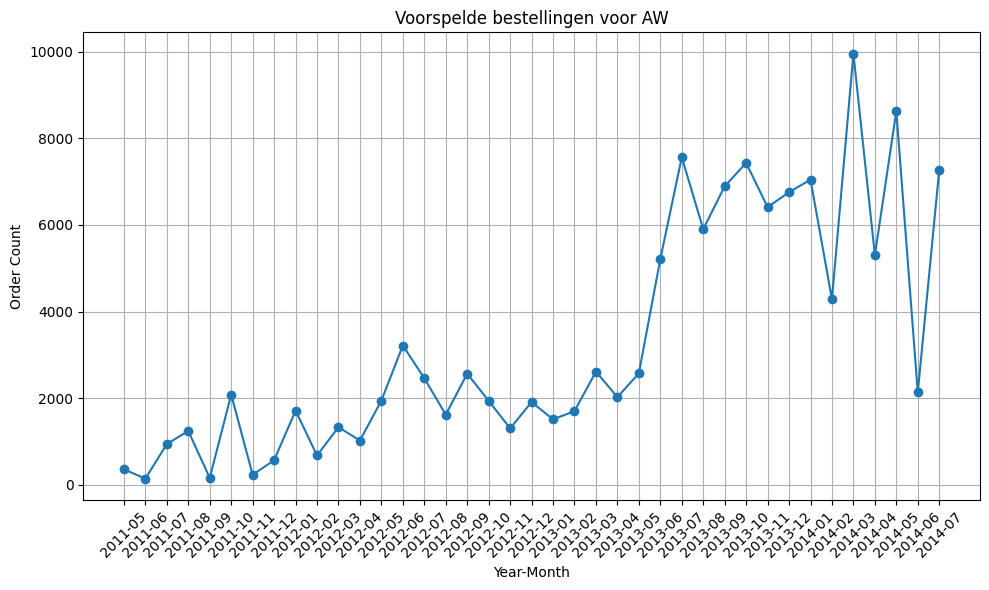

In [67]:
import matplotlib.pyplot as plt

# Gegevens
dates = values_dict.columns
order_counts = values_dict.values[0]

# Maak de plot
plt.figure(figsize=(10, 6))
plt.plot(dates, order_counts, marker='o', linestyle='-')
plt.title('Voorspelde bestellingen voor AW')
plt.xlabel('Year-Month')
plt.ylabel('Order Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
